### Outline
1. Importation of Libraries
2. Data Importation
3. Sanity Checks and Data Preprocessing
4. Business Questions For Guidance
5. Conclusions and Recommendations

## Importation of packages

In [172]:
#Data Handling
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical Modelling Package
import statsmodels.api as sm

#Other Packages
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Importation

In [173]:
data = pd.read_csv('superstore data (1).csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

## Sanity Checks

In [174]:
# Data Shape
data.shape

(51290, 24)

In [175]:
#  first row
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


In [176]:
#  last row
data.tail(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [177]:
# Data types and Non-Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [178]:
# Changing the order and shape dates datatypes.
data['Ship Date'] = pd.to_datetime(data['Ship Date'],format ='mixed')
data['Order Date'] = pd.to_datetime(data['Order Date'],format ='mixed')

In [179]:
# Changes reflected (Order Date and Ship Date)
data.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [180]:
# All Columns
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [181]:
# Sum of nulls per Column
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [182]:
#Checking to see the missing values in the Postal Code Column
data["Postal Code"].unique

<bound method Series.unique of 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285    94533.0
51286        NaN
51287        NaN
51288        NaN
51289    80538.0
Name: Postal Code, Length: 51290, dtype: float64>

In [183]:
# Checking for unique values
data['Row ID'].unique()

array([42433, 22253, 48883, ...,  8857,  6852, 36388], dtype=int64)

In [184]:
# Datatype renaming
data['Row ID'] = data['Row ID'].astype('str')

In [185]:
# Summary Statistics of Categorical Variables
data.describe(include ='object')

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,51290,25035,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,42433,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,1,14,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [186]:
# Summary Statistics of Numerical Variables
data.describe(include = np.number)

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [187]:
#Summary Statistics of Datetime Variables
datetime_vars = ['Order Date', 'Ship Date']
data[datetime_vars].describe()

,Order Date,Ship Date
count,51290,51290
mean,2013-04-30 17:16:21.384285440,2013-05-05 19:10:10.504971776
min,2011-01-01 00:00:00,2011-01-02 00:00:00
25%,2012-06-06 00:00:00,2012-06-13 00:00:00
50%,2013-06-26 00:00:00,2013-06-30 00:00:00
75%,2014-04-30 00:00:00,2014-05-09 00:00:00
max,2014-12-31 00:00:00,2015-07-01 00:00:00


In [188]:
# Column renaming
data.rename(columns = {"Sales" : "Sales($)", 
                        "Profit" : "Profit($)",
                         "Shipping Cost" : "Shipping Cost($)",
                         "Discount" : "Discount($)",
                          "Unit price (sale/quantity)" : "Unit price($)(sale/quantity)"},inplace = True)

In [189]:
# Creating a column for Interval Days
data['Interval_days'] = (data['Ship Date'] - data['Order Date']).dt.days

In [190]:
#Creating a column for months.
data['Month'] = data['Order Date'].dt.strftime('%B')

In [191]:
# Creating a column for year
data['Year'] = data['Order Date'].dt.year

In [192]:
# Creating a column for loss
data['Loss($)'] = 0 
data.loc[data['Profit($)'] < 0, 'Loss($)'] = data.loc[data['Profit($)'] < 0, 'Profit($)']
print(data[['Order ID', 'Profit($)', 'Loss($)']])

              Order ID  Profit($)  Loss($)
0         AG-2011-2040   106.1400   0.0000
1        IN-2011-47883    36.0360   0.0000
2         HU-2011-1220    29.6400   0.0000
3      IT-2011-3647632   -26.0550 -26.0550
4        IN-2011-47883    37.7700   0.0000
...                ...        ...      ...
51285   CA-2014-115427     4.5188   0.0000
51286     MO-2014-2560     0.4200   0.0000
51287   MX-2014-110527    12.3600   0.0000
51288   MX-2014-114783     0.5600   0.0000
51289   CA-2014-156720    -0.6048  -0.6048

[51290 rows x 3 columns]


In [193]:
#Creating a column for Unit price (sales/quantity)
data['Unit price($) (sale/quantity)'] = data['Sales($)'] / data['Quantity']

In [194]:
#Inspecting the dataframe
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales($),Quantity,Discount($),Profit($),Shipping Cost($),Order Priority,Interval_days,Month,Year,Loss($),Unit price($) (sale/quantity)
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,151,January,2011,0.0,204.15


# Exploratory Data Analysis (Univariate Analysis) for Numerical Variables

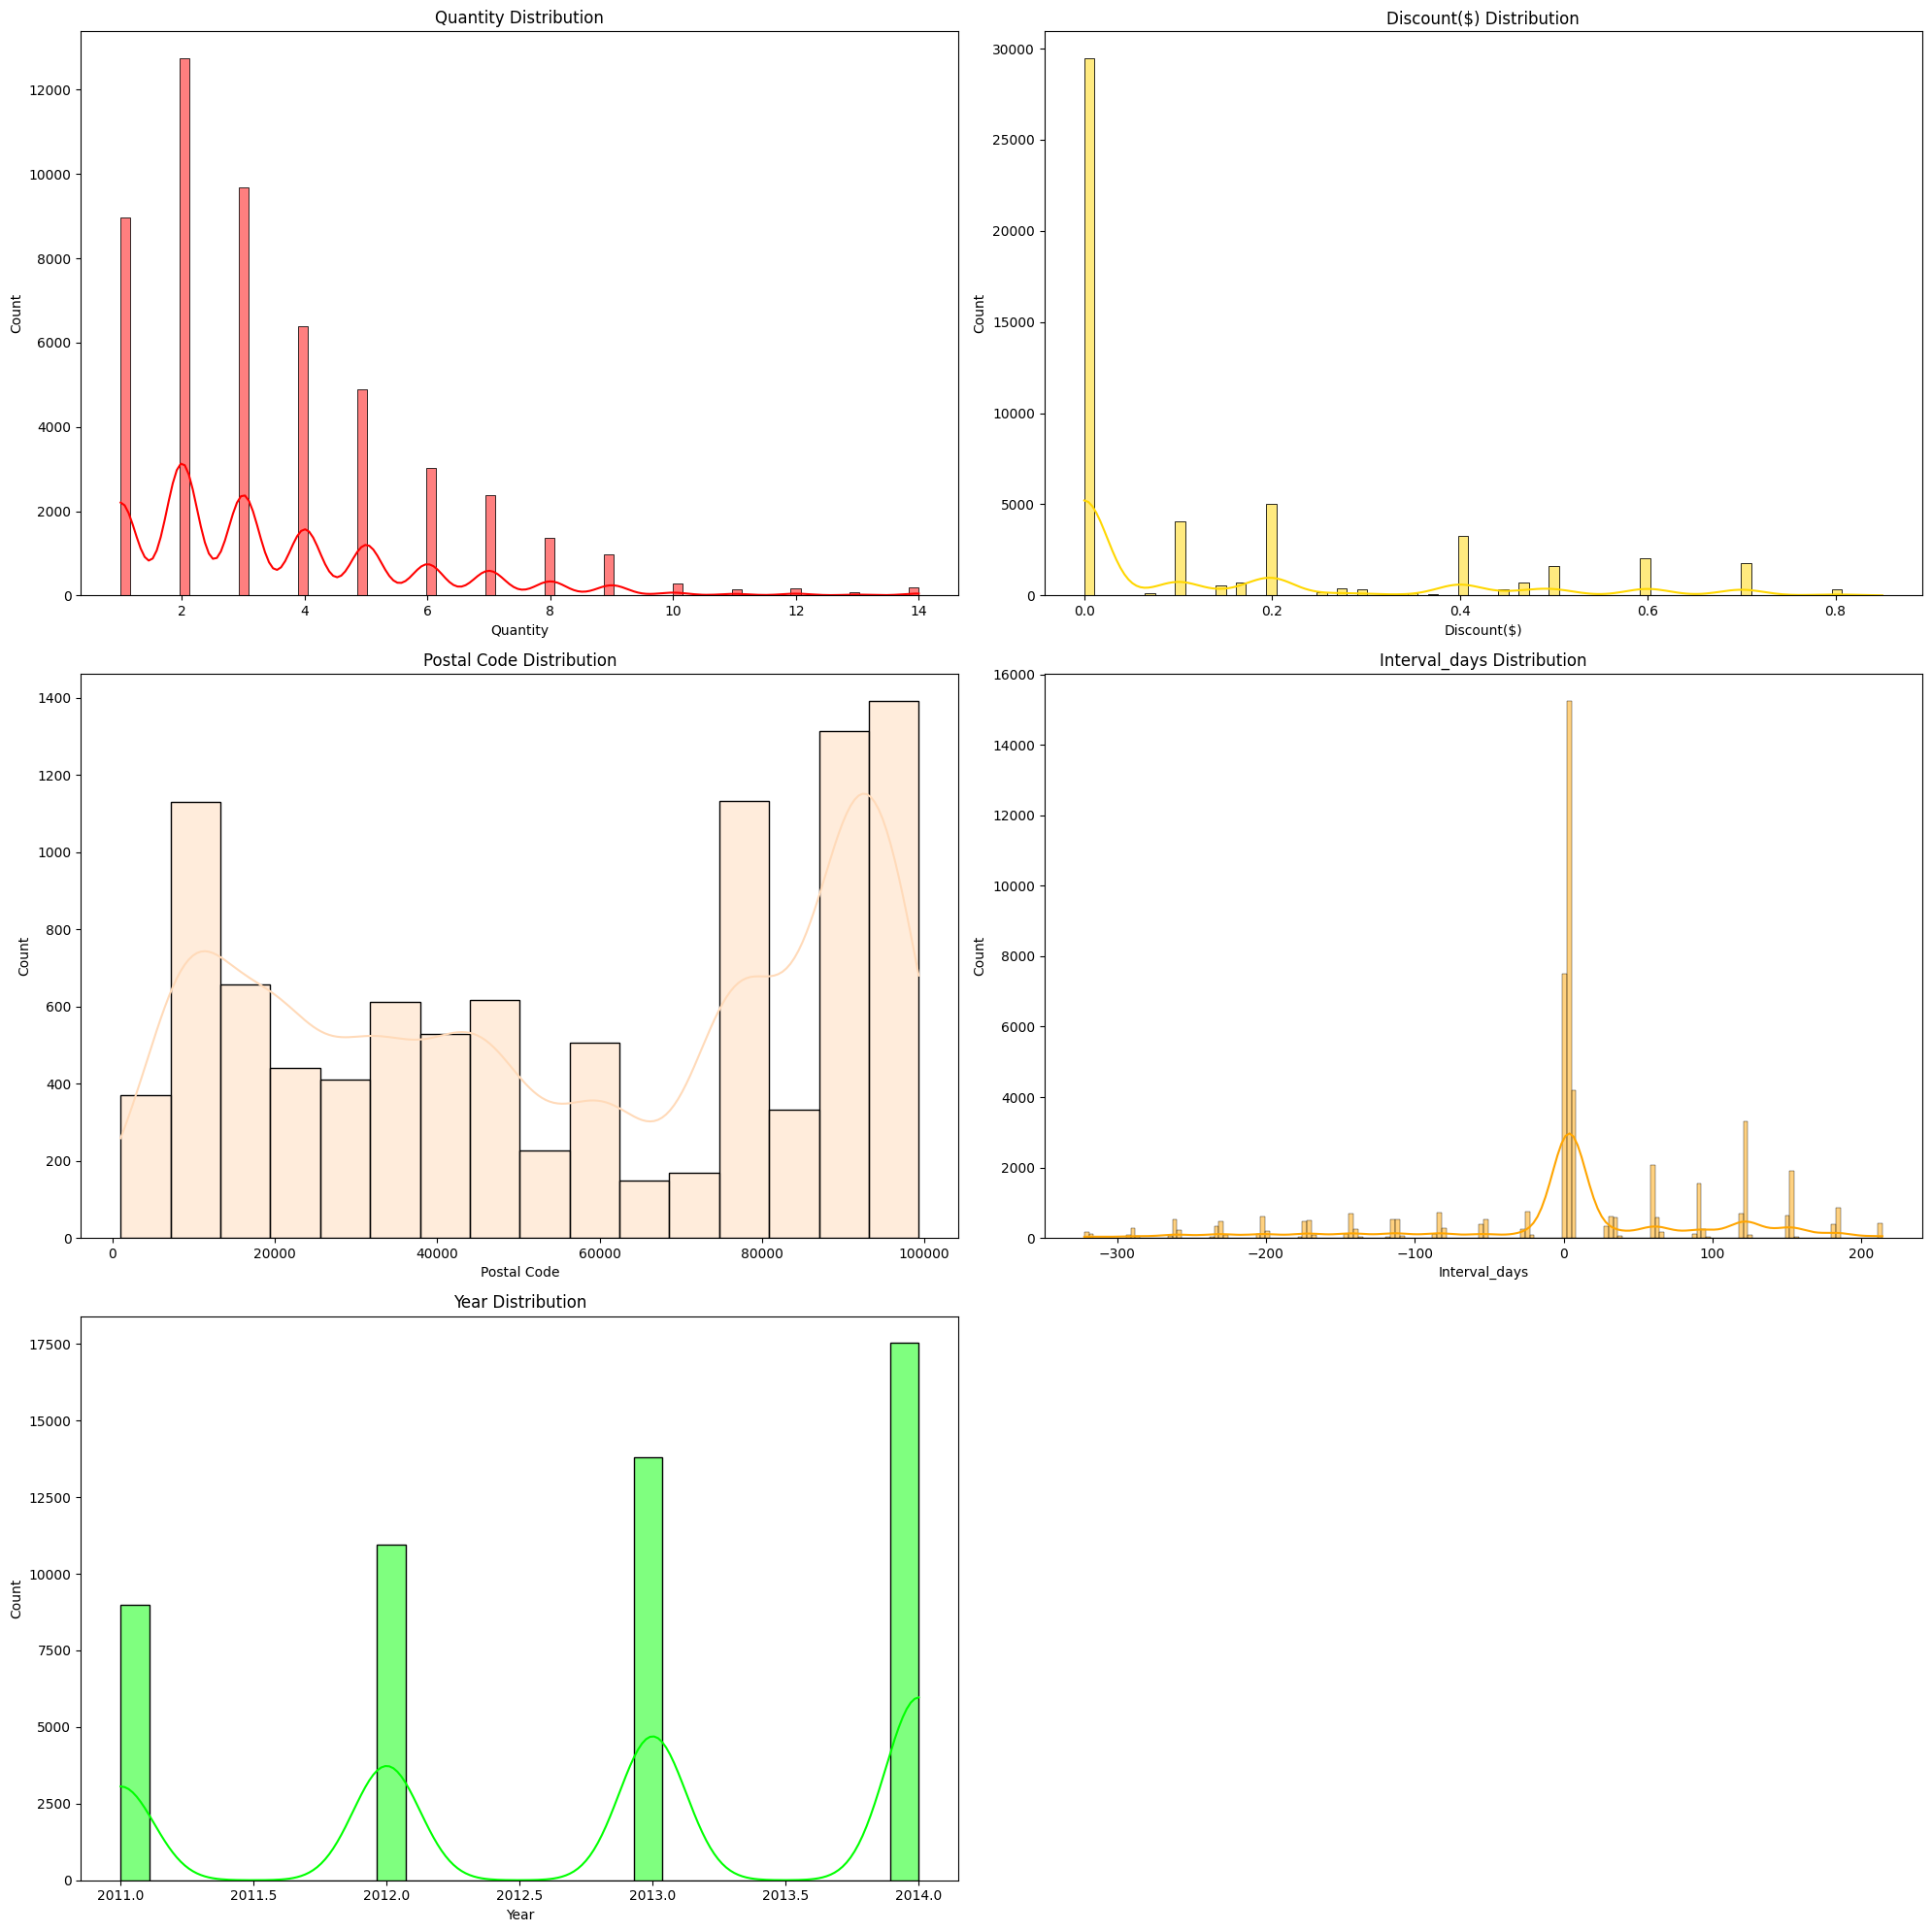

In [195]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
sns.histplot(data=data, x="Quantity", ax=axes[0,0], kde=True, color="r").set_title('Quantity Distribution')
sns.histplot(data=data, x="Discount($)", ax=axes[0,1], kde=True, color="gold").set_title('Discount($) Distribution')
sns.histplot(data=data, x="Postal Code", ax=axes[1,0], kde=True, color="peachpuff").set_title('Postal Code Distribution')
sns.histplot(data=data, x="Interval_days", ax=axes[1,1], kde=True, color="orange").set_title('Interval_days Distribution')
sns.histplot(data=data, x="Year", ax=axes[2,0], kde=True, color="lime").set_title('Year Distribution')
fig.delaxes(axes[2,1])
plt.tight_layout()  
plt.show()

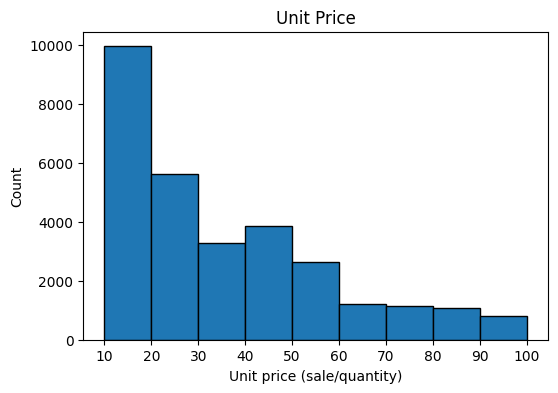

In [196]:
bins = [10,20,30,40,50,60,70,80,90,100]

plt.figure(figsize=(6,4))
plt.hist(data['Unit price($) (sale/quantity)'],bins=bins,edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Unit price (sale/quantity)')
plt.xticks(bins)
plt.title('Unit Price')
plt.show()

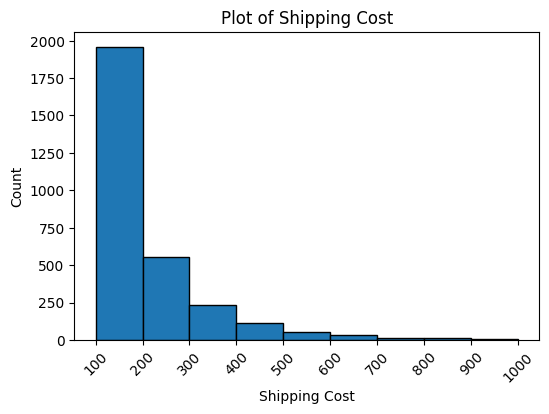

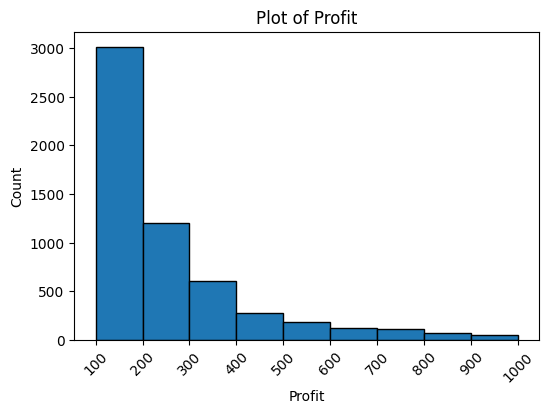

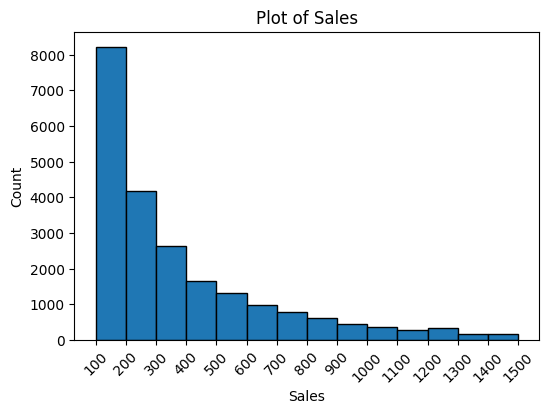

In [197]:
bin_1 = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bin_2 = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bin_3 = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

# Plotting histogram for 'Shipping Cost'
plt.figure(figsize=(6, 4))
plt.hist(data['Shipping Cost($)'], bins=bin_1, edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Shipping Cost')
plt.xticks(bin_1)
plt.title('Plot of Shipping Cost')
plt.xticks(rotation = 45)
plt.show()

# Plotting histogram for 'Profit'
plt.figure(figsize=(6, 4))
plt.hist(data['Profit($)'], bins=bin_2, edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Profit')
plt.xticks(bin_2)
plt.title('Plot of Profit')
plt.xticks(rotation = 45)
plt.show()

# Plotting histogram for 'Sales'
plt.figure(figsize=(6, 4))
plt.hist(data['Sales($)'], bins=bin_3, edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Sales')
plt.xticks(bin_3)
plt.title('Plot of Sales')
plt.xticks(rotation = 45)
plt.show()

# Exploratory Data Analysis (Univariate Analysis) for Categorical Variables

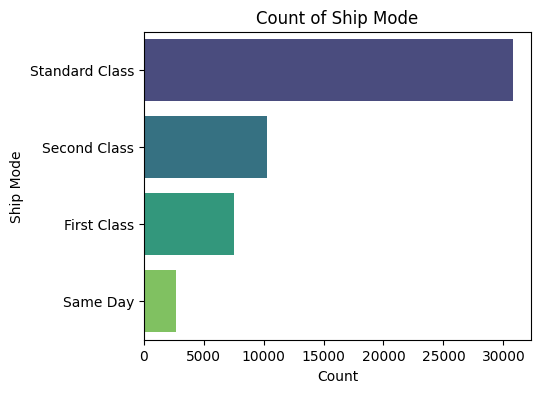

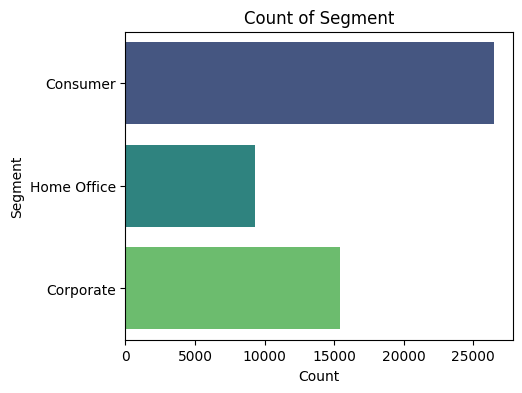

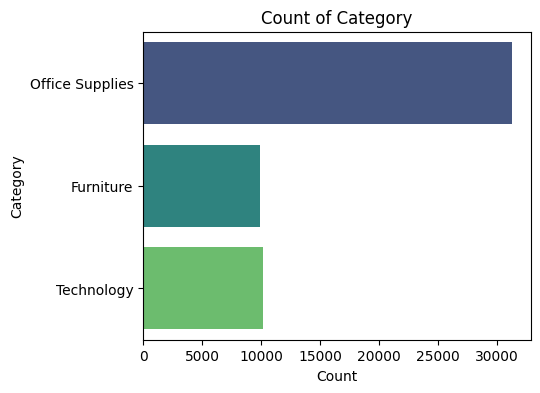

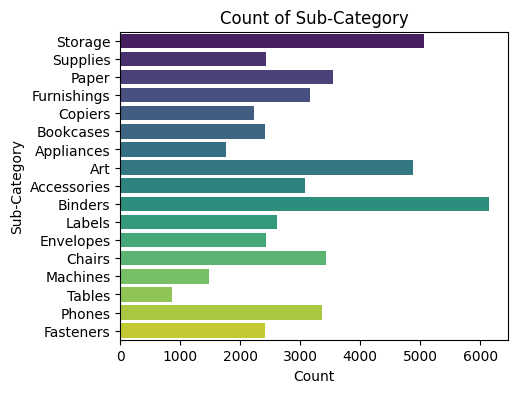

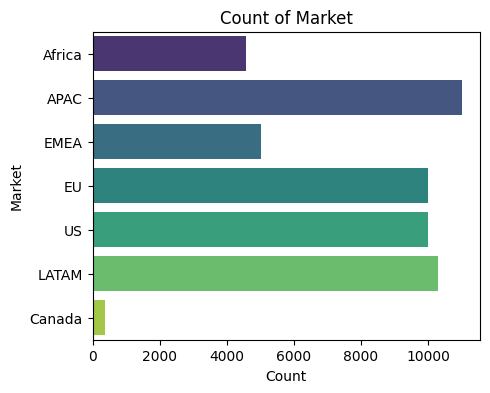

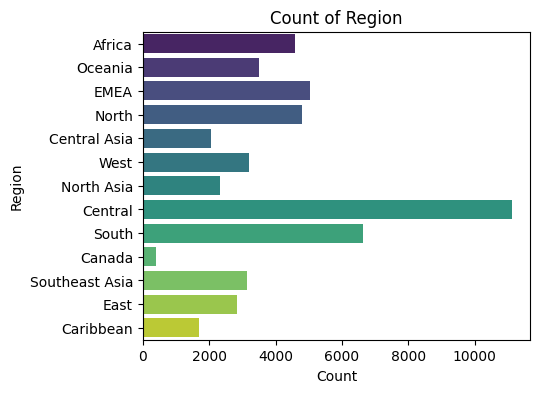

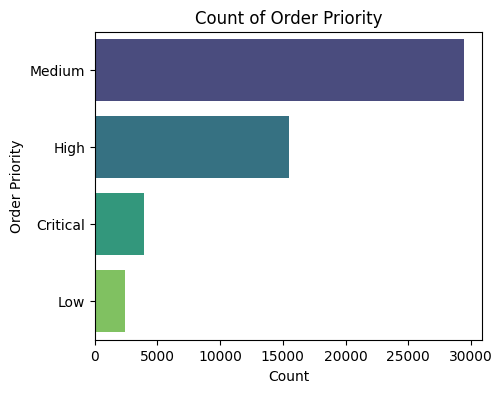

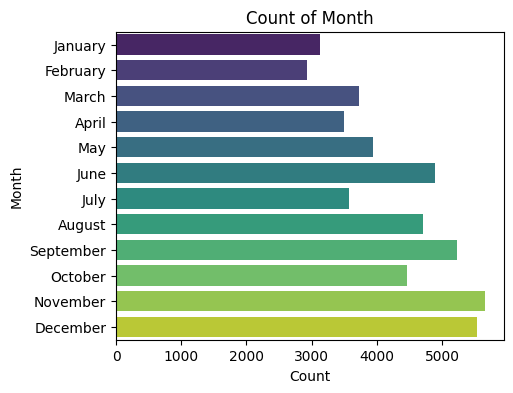

In [198]:
# Categorical Variables
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

categorical = ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Market', 'Region', 'Order Priority', 'Month']
for var in categorical:
    plt.figure(figsize=(5, 4))
    if var == 'Month':
        sns.countplot(data=data, y=var, order=month_order, palette='viridis')
    else:
        sns.countplot(data=data, y=var, palette='viridis')
    plt.title(f'Count of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)
    plt.show()  

# # Exploratory Data Analysis (Multivariate Analysis)

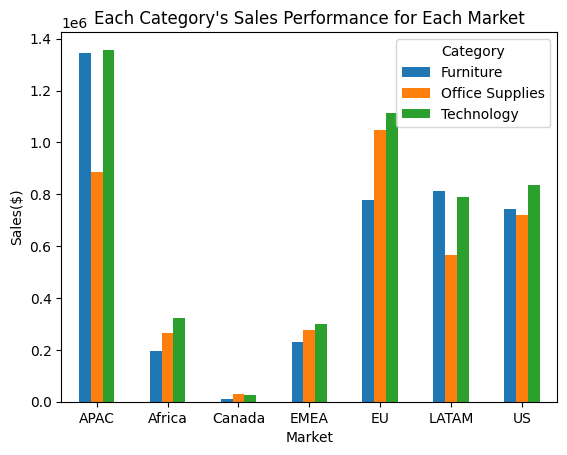

In [199]:
category_income =data.pivot_table(index = ['Market'],
                       columns ='Category',
                       values = ['Sales($)','Profit($)'],
                      aggfunc = 'sum')
category_income['Profit($)']


category_sales = category_income['Sales($)']

# Plotting the bar plot
category_sales.plot(kind='bar', stacked = False)
plt.xlabel('Market')
plt.ylabel('Sales($)')
plt.xticks(rotation = 360)
plt.title('Each Category\'s Sales Performance for Each Market')
plt.legend(title='Category')

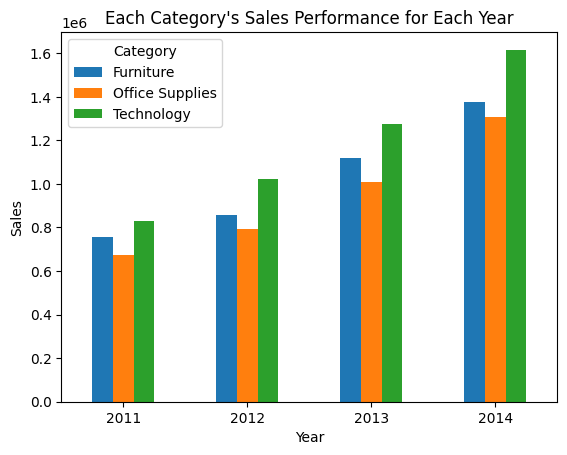

In [200]:
category_year =data.pivot_table(index = ['Year'],
                       columns ='Category',
                       values = ['Sales($)','Profit($)'],
                      aggfunc = 'sum')
category_year['Profit($)']

category_year1 = category_year['Sales($)']

# Plotting the bar plot
category_year1.plot(kind='bar', stacked = False)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation = 360)
plt.title('Each Category\'s Sales Performance for Each Year')
plt.legend(title='Category')

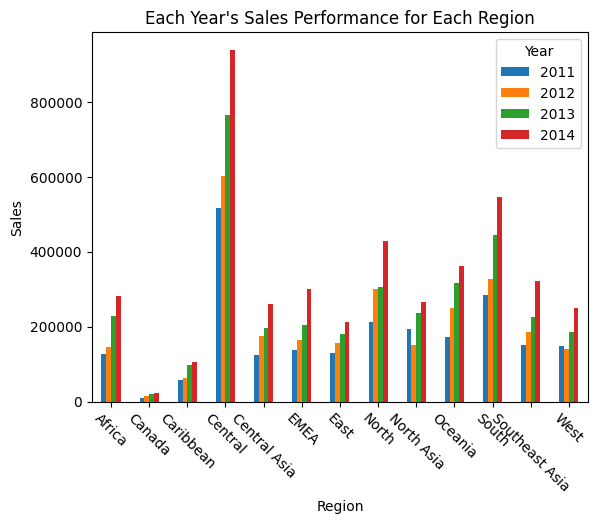

In [201]:
region_income =data.pivot_table(index = ['Region'],
                       columns ='Year',
                       values = ['Sales($)','Profit($)'],
                      aggfunc = 'sum')
region_income['Profit($)']

region_sales = region_income['Sales($)']

# Plotting the bar plot
region_sales.plot(kind='bar', stacked = False)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation = 315)
plt.title('Each Year\'s Sales Performance for Each Region')
plt.legend(title='Year')

# Questions

### 1. What is the sales and profit per market?

In [202]:
# sales and profit per market?
sales_profit_per_market = data.groupby('Market')[['Sales($)', 'Profit($)']].sum().reset_index()
sales_profit_per_market

,Market,Sales($),Profit($)
0,APAC,3.585744e+06,436000.04900
1,Africa,7.837732e+05,88871.63100
2,Canada,6.692817e+04,17817.39000
3,EMEA,8.061613e+05,43897.97100
4,EU,2.938089e+06,372829.74150
5,LATAM,2.164605e+06,221643.48708
6,US,2.297201e+06,286397.02170


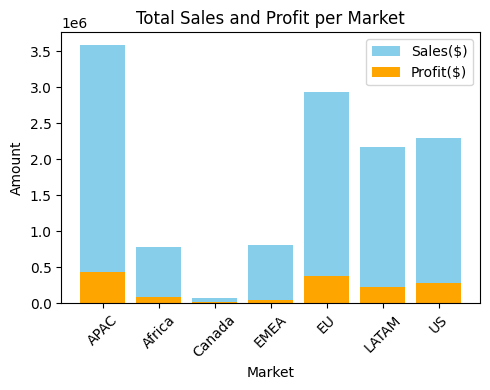

In [203]:
plt.figure(figsize=(5, 4))
plt.bar(sales_profit_per_market['Market'], sales_profit_per_market['Sales($)'], color='skyblue', label='Sales($)')
plt.bar(sales_profit_per_market['Market'], sales_profit_per_market['Profit($)'], color='orange', label='Profit($)')
plt.xlabel('Market')
plt.ylabel('Amount')
plt.title('Total Sales and Profit per Market')
plt.xticks(rotation=45)  
plt.legend()
plt.tight_layout()
plt.show()

### 2a. What is the most profitable market?

In [204]:
# most profitable market?
most_profitable_market = sales_profit_per_market.loc[sales_profit_per_market['Profit($)'].idxmax()]
most_profitable_market

Market              APAC
Sales($)     3585744.129
Profit($)     436000.049
Name: 0, dtype: object

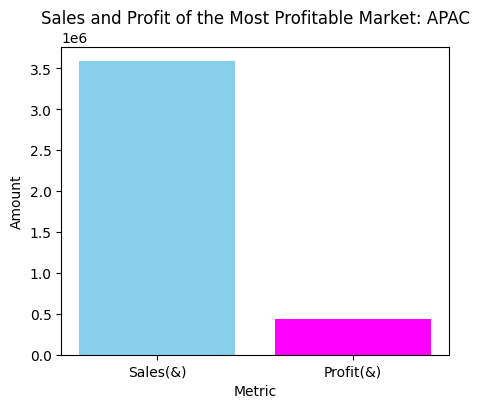

In [205]:
plt.figure(figsize=(5, 4))
plt.bar(['Sales(&)', 'Profit(&)'], [most_profitable_market['Sales($)'], most_profitable_market['Profit($)']], color=['skyblue', 'fuchsia'])
plt.xlabel('Metric')
plt.ylabel('Amount')
plt.title('Sales and Profit of the Most Profitable Market: ' + most_profitable_market['Market'])
plt.show()

### 2b. What is the least profitable market?

In [206]:
# least profitable market
least_profitable_market = sales_profit_per_market.loc[sales_profit_per_market['Profit($)'].idxmin()]
least_profitable_market 

Market         Canada
Sales($)     66928.17
Profit($)    17817.39
Name: 2, dtype: object

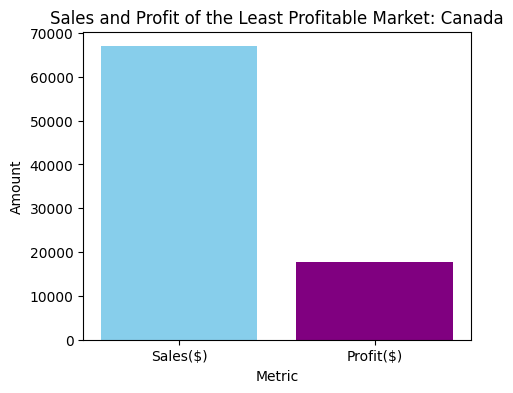

In [207]:
plt.figure(figsize=(5, 4))
plt.bar(['Sales($)', 'Profit($)'], [least_profitable_market['Sales($)'], least_profitable_market['Profit($)']], color=['skyblue', 'purple'])
plt.xlabel('Metric')
plt.ylabel('Amount')
plt.title('Sales and Profit of the Least Profitable Market: ' + least_profitable_market['Market'])
plt.show()

### 3. How are you going to increase the sales for the products that was least bought?

In [208]:
# sales for the products that was least bought
least_bought_products = data.loc[data.groupby('Product Name')['Sales($)'].transform('sum').idxmin()]
least_bought_products[['Product Name', 'Sales($)']]

Product Name    Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac
Sales($)                                                                   1.624
Name: 17901, dtype: object

### Strategies
*  Targeted marketing
*  Discounts
*  Product improvement

### 4. Which month does the company records more sales?

In [209]:
month_more_sales =  data.loc[data.groupby('Month')['Sales($)'].transform('sum').idxmax()]
month_more_sales

Row ID                                           2382
Order ID                               MX-2011-141530
Order Date                        2011-12-01 00:00:00
Ship Date                         2011-01-17 00:00:00
Ship Mode                              Standard Class
Customer ID                                  TS-21205
Customer Name                             Thomas Seio
Segment                                     Corporate
City                                          Torreón
State                                        Coahuila
Country                                        Mexico
Postal Code                                       NaN
Market                                          LATAM
Region                                          North
Product ID                            TEC-AC-10004743
Category                                   Technology
Sub-Category                              Accessories
Product Name                     Logitech Router, USB
Sales($)                    

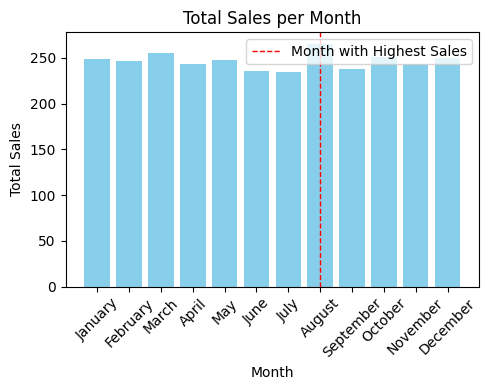

In [210]:
# Grouping by 'Month' and summing the 'Sales' for each month
monthly_sales = data.groupby('Month')['Sales($)'].mean()

# Finding the month with the highest total sales
month_more_sales = monthly_sales.idxmax()

plt.figure(figsize=(5, 4))
plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(rotation=45)  
plt.axvline(x=month_more_sales, color='red', linestyle='--', linewidth=1, label='Month with Highest Sales')  # Add a vertical line for the month with the highest sales
plt.legend()
plt.tight_layout()
plt.show()

### 5. What is the correlation between discount and sale?

In [211]:
correlation = data['Discount($)'].corr(data['Sales($)'])
print(f"Correlation between Discount and Sales: {correlation}")

Correlation between Discount and Sales: -0.08672186697182649


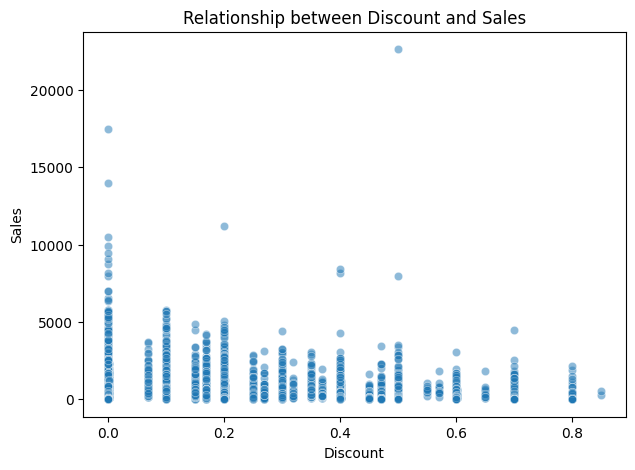

In [212]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='Discount($)', y='Sales($)' , alpha = 0.5)
plt.title('Relationship between Discount and Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

In [213]:
# Calculate the correlation between shipping cost  and sale
correlation = data['Shipping Cost($)'].corr(data['Sales($)'])

# Display the correlation coefficient
print(f"Correlation between Shipping Cost and Sales: {correlation}")

Correlation between Shipping Cost and Sales: 0.7680728376889518


### 6.Does the shipping cost affect the sales?

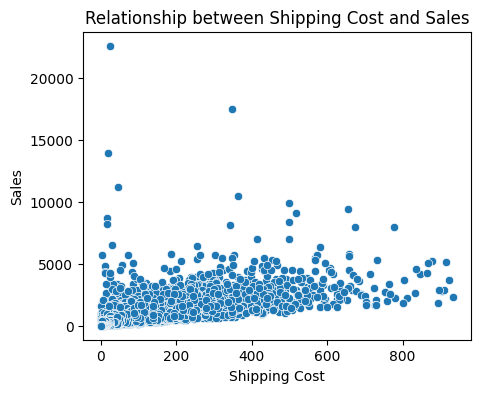

In [214]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=data, x='Shipping Cost($)', y='Sales($)')
plt.title('Relationship between Shipping Cost and Sales')
plt.xlabel('Shipping Cost')
plt.ylabel('Sales')
plt.show()

### 7. What is the dominant product category in each market?

In [215]:
market_category_counts = data.groupby('Market')['Category'].value_counts().reset_index(name = 'Count')
market_category_counts

,Market,Category,Count
0,APAC,Office Supplies,6177
1,APAC,Furniture,2429
2,APAC,Technology,2396
3,Africa,Office Supplies,3045
4,Africa,Technology,911
5,Africa,Furniture,631
6,Canada,Office Supplies,277
7,Canada,Technology,65
8,Canada,Furniture,42
9,EMEA,Office Supplies,3297


In [216]:
dominant_product =data.pivot_table(index = ['Market'],
                       columns ='Category',
                       values = 'Quantity',
                      aggfunc = 'sum')
dominant_product

Category,Furniture,Office Supplies,Technology
Market,,,
APAC,9099,23134,8993
Africa,1431,7102,2031
Canada,78,613,142
EMEA,1780,7478,2259
EU,5671,24883,7219
LATAM,8867,22066,7593
US,8028,22906,6939


In [217]:
category_colors = {'Technology': 'turquoise', 'Office Supplies': 'purple', 'Furniture': 'peachpuff'}

category_sales = dominant_product

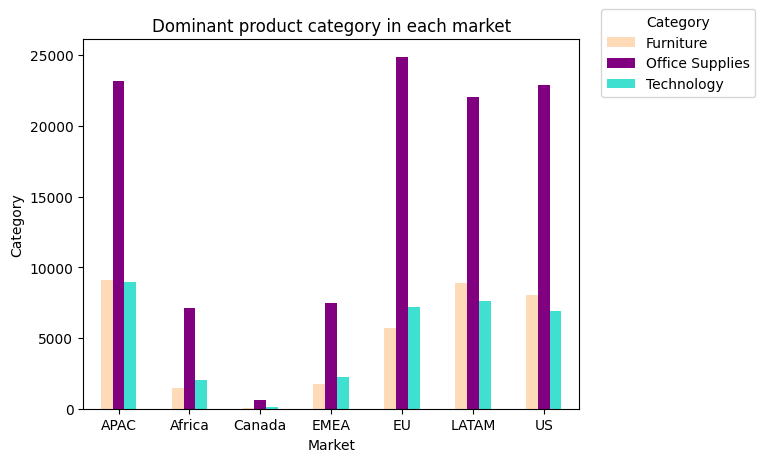

In [218]:
# Plotting the bar plot
category_sales.plot(kind='bar', stacked = False, color = category_colors)
plt.xlabel('Market')
plt.ylabel('Category')
plt.xticks(rotation = 360)
plt.title("Dominant product category in each market")
plt.legend(title='Category', loc = "upper center", bbox_to_anchor=(1.2, 1.1))

### 8. City with most orders for each product category?

In [219]:
product_category_city = data.groupby('City')['Category'].value_counts().reset_index(name = 'Count')
top_three_cities = product_category_city.groupby('Category').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
top_three_cities

,City,Category,Count
0,New York City,Furniture,192
1,Los Angeles,Furniture,154
2,Philadelphia,Furniture,111
3,New York City,Office Supplies,552
4,Los Angeles,Office Supplies,443
5,San Francisco,Office Supplies,322
6,New York City,Technology,171
7,Los Angeles,Technology,150
8,Philadelphia,Technology,114


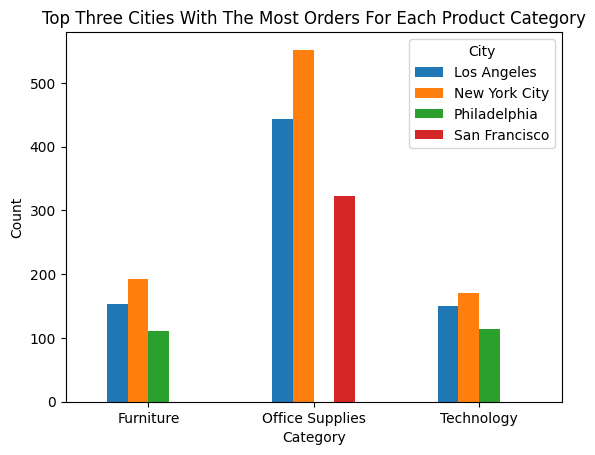

In [220]:
category_city = top_three_cities.pivot_table(index=['Category'],
                                             columns='City',
                                             values='Count',
                                             aggfunc='sum')

category_city.plot(kind='bar', stacked=False)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.title("Top Three Cities With The Most Orders For Each Product Category")
plt.legend(title='City')
plt.show()

### 9. Which products are making loss?

In [221]:
product_loss = data.groupby('Product Name')[["Loss($)"]].sum()
product_loss

loss_making_products = product_loss[product_loss["Loss($)"] < 0]
losses = loss_making_products.sort_values(by = "Loss($)", ascending = True)
top10_losses = losses.head(10)
top10_losses

,Loss($)
Product Name,
Cubify CubeX 3D Printer Double Head Print,-9239.9692
"Hoover Stove, White",-6941.3190
GBC DocuBind P400 Electric Binding System,-6859.3896
"Apple Smart Phone, Full Size",-6561.1119
"Motorola Smart Phone, Cordless",-6511.9380
"Samsung Smart Phone, Cordless",-6191.9100
"Cisco Smart Phone, Cordless",-5516.2600
"Nokia Smart Phone, Full Size",-5286.4945
Lexmark MX611dhe Monochrome Laser Printer,-5269.9690


<Figure size 1000x600 with 0 Axes>

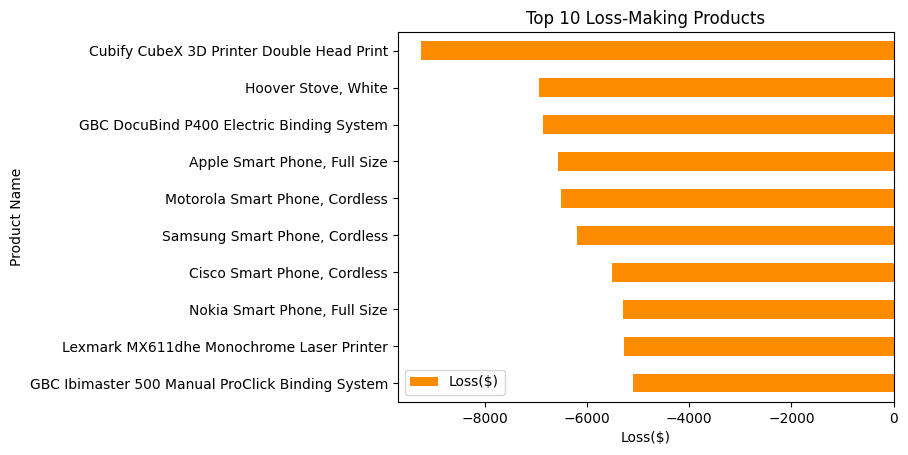

In [222]:
plt.figure(figsize=(10, 6))
top10_losses.plot(kind='barh', color='darkorange')
plt.xlabel('Loss($)')
plt.ylabel('Product Name')
plt.title('Top 10 Loss-Making Products')
plt.gca().invert_yaxis()  
plt.show()

### 10. Which segment provides more profit?

In [223]:
segment_profits = data.groupby("Segment")["Profit($)"].sum().reset_index(name = "Segment_Profits($)")
segment_profits

,Segment,Segment_Profits($)
0,Consumer,749239.78206
1,Corporate,441208.32866
2,Home Office,277009.18056


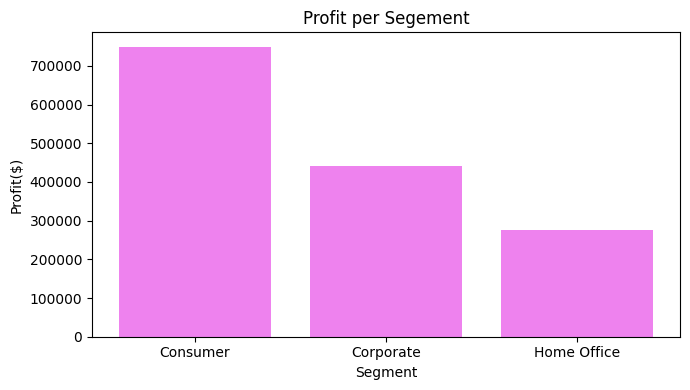

In [224]:
plt.figure(figsize=(7, 4))
plt.bar(segment_profits["Segment"], segment_profits["Segment_Profits($)"], color='violet')
plt.xlabel('Segment')
plt.ylabel('Profit($)')
plt.title('Profit per Segement') 
plt.tight_layout()
plt.show()

### 11. What is the correlation between quantity and profit?

In [225]:
correlation = data['Quantity'].corr(data['Profit($)'])

print("Correlation between Quantity and Profit:", correlation)


Correlation between Quantity and Profit: 0.10436502716960334


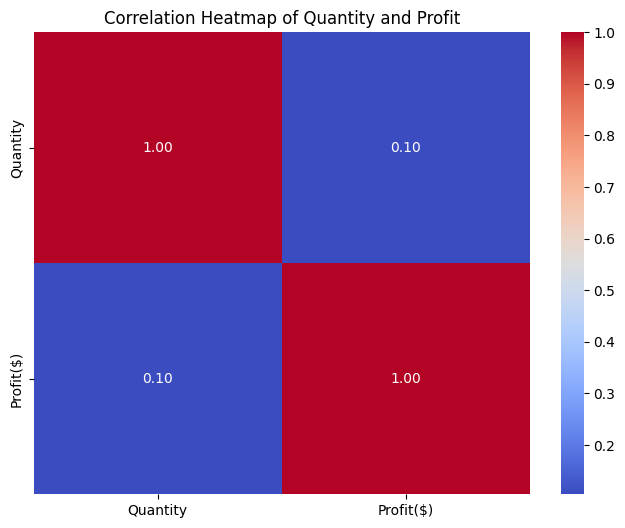

In [226]:
correlation_matrix = data[['Quantity', 'Profit($)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Quantity and Profit')
plt.show()

### 12. What is the correlation between shipping cost and profit?

In [227]:
correlation = data['Shipping Cost($)'].corr(data['Profit($)'])

print("Correlation between Shipping Cost and Profit:", correlation)

Correlation between Shipping Cost and Profit: 0.35444090153267516


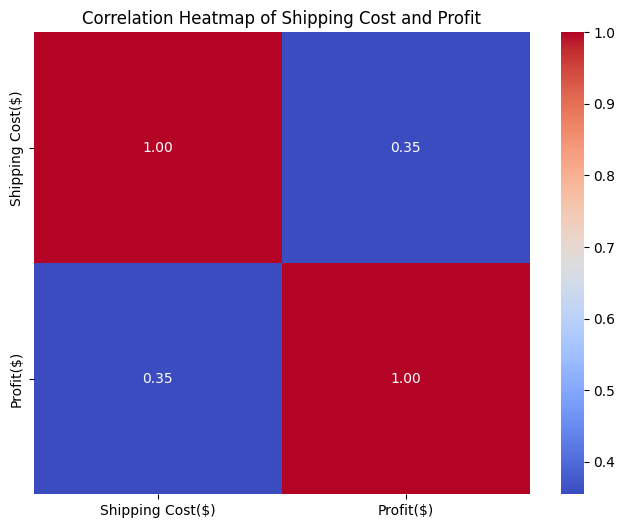

In [228]:
correlation_matrix = data[['Shipping Cost($)', 'Profit($)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Shipping Cost and Profit')
plt.show()

### 13. Which order priority yields more sales?

In [229]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales($),Quantity,Discount($),Profit($),Shipping Cost($),Order Priority,Interval_days,Month,Year,Loss($),Unit price($) (sale/quantity)
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,151,January,2011,0.0,204.15


In [230]:
priority_sales = data.groupby("Order Priority")["Sales($)"].sum().reset_index(name = "Priority Sales($)")
priority_sales

,Order Priority,Priority Sales($)
0,Critical,9.862355e+05
1,High,3.807548e+06
2,Low,5.678259e+05
3,Medium,7.280892e+06


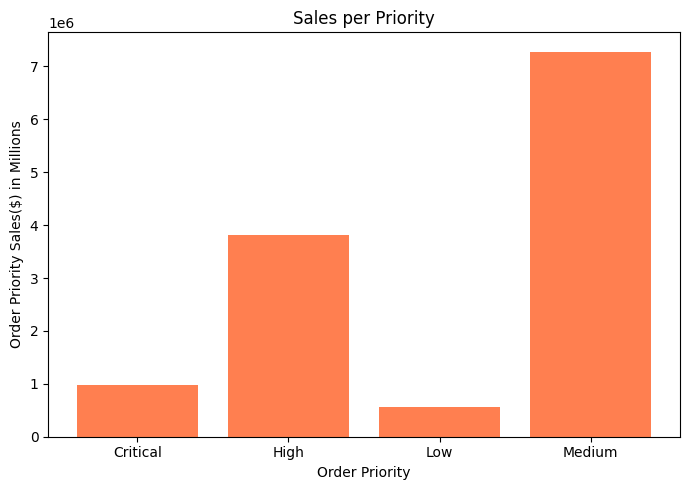

In [231]:
plt.figure(figsize=(7, 5))
plt.bar(priority_sales["Order Priority"], priority_sales["Priority Sales($)"], color='coral')
plt.xlabel('Order Priority')
plt.ylabel('Order Priority Sales($) in Millions')
plt.title('Sales per Priority') 
plt.tight_layout()
plt.show()

### 14. What is the average shipping cost to each region?

In [232]:
avg_shipping_cost = data.groupby("Region")["Shipping Cost($)"].mean().reset_index(name = "Avg Shipping Cost($)")
avg_shipping_cost

,Region,Avg Shipping Cost($)
0,Africa,19.215058
1,Canada,19.285495
2,Caribbean,21.059260
3,Central,26.710494
4,Central Asia,38.003003
5,EMEA,17.573221
6,East,25.542001
7,North,27.476299
8,North Asia,40.646112
9,Oceania,34.593780


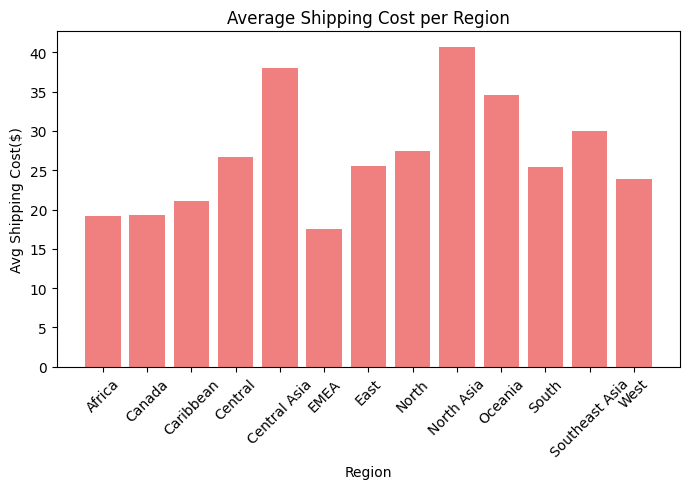

In [233]:
plt.figure(figsize=(7, 5))
plt.bar(avg_shipping_cost["Region"], avg_shipping_cost["Avg Shipping Cost($)"], color='lightcoral')
plt.xlabel('Region')
plt.ylabel('Avg Shipping Cost($)')
plt.title('Average Shipping Cost per Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 15. What product categories should be targetted to the different markets?

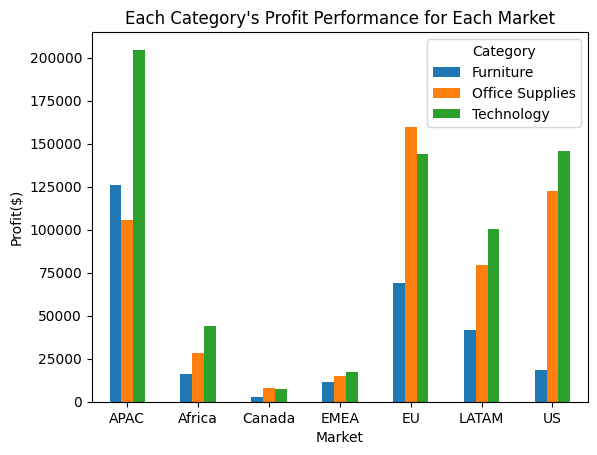

In [234]:
category_income =data.pivot_table(index = ['Market'],
                       columns ='Category',
                       values = ['Profit($)'],
                      aggfunc = 'sum')
category_profit = category_income['Profit($)']

# Plotting the bar plot
category_profit.plot(kind='bar', stacked = False)
plt.xlabel('Market')
plt.ylabel('Profit($)')
plt.xticks(rotation = 360)
plt.title('Each Category\'s Profit Performance for Each Market')
plt.legend(title='Category')

### 16. Does the interval between the order date and the shipping date affect sale and profit ?

In [235]:
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '>200']

data['Interval_category'] = pd.cut(data['Interval_days'], bins=bins, labels=labels, right=False)

interval_groups = data.groupby('Interval_category').agg({'Sales($)': 'sum', 'Profit($)': 'sum'}).reset_index()

interval_groups

,Interval_category,Sales($),Profit($)
0,0-50,7.150903e+06,820378.41496
1,51-100,1.151160e+06,128655.18008
2,101-150,1.001851e+06,127487.67590
3,151-200,8.959362e+05,114054.91708
4,>200,1.013792e+05,15017.77474


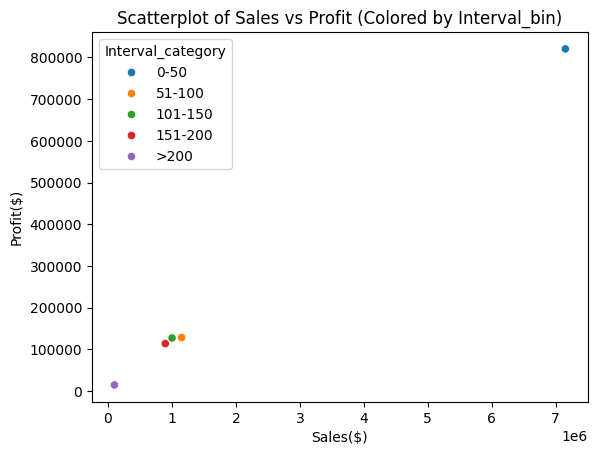

In [236]:
sns.scatterplot(data=interval_groups, x='Sales($)', y='Profit($)', hue='Interval_category')
plt.title('Scatterplot of Sales vs Profit (Colored by Interval_bin)')
plt.show()

### 17. Is there a strong correlation between Shipping Cost, Quantity and profit?

In [237]:
data = pd.read_csv('superstore data (1).csv',encoding='utf-8', encoding_errors='replace')
X = data[['Quantity','Shipping Cost']] 
y = data['Profit'] 
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     3687.
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        14:38:42   Log-Likelihood:            -3.3404e+05
No. Observations:               51290   AIC:                         6.681e+05
Df Residuals:                   51287   BIC:                         6.681e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8726      1.313     -1.426

## Conclusions with Recommendations.


**Factors affecting sales**

* The interval between the order date and the shipping date affect sales and profits. Items shipped between 0-50 days recorded higher sales and profits whilst those shipped after 50 days recorded lower sales and profits. It would be prudent to ship products in no later than 50 days.

* The Consumer segment makes the most profit and should be highly invested in.

* APAC, Africa, EMEA, LATAM and US recorded the highest profits for technology, while Canada and EU recorded the highest profits for office supplies. To generate more revenue, APAC, Africa, EMEA, LATAM and the US should therefore have technology as their target product while Canada and EU should have office supplies as their target product.

* The most profitable market is APAC with profit of \$ 436,000.049  and  sales of \$ 5,585,744.129 while the least profitable market is Canada with profit of \$ 17,817.39 and sales of \$ 66,928.17. Also Canada recorded the least sales in all 4 years. The company should focus on attracting more customers from this region through proper advertisement.


**What type of items should they run promotions on, and why ?**
* Cubify CubeX 3D Printer Double Head Print, Hoover Stove, White, GBC DocuBind P400 Electric Binding System, Apple Smartphone, Full Size, Motorola Smartphone, Cordless, Samsung Smart Phone, Cordless, Cisco Smart Phone Cordless, Nokia Smartphone, Full Size, Lexmark MX611dhe Monochrome Laser Printer and GBC Ibimaster 500 Manual ProClick Binding System are the *products* that bring the company the most losses. 

* Least purchased product was "Eureka disposable bags for Sanitaire Vibra Groomer I Upright Vac" with profit of \$ 0.8 and a discount of 2%, the product was making a loss of \$ 4.466.To increase the sale of this product, the company can do these three things; Targeted marketing, discounts and product improvement.
  

**Additional data-driven insights to give them a competitive edge**
* The difference between the order date and ship date were negative in some instances. This could be a data entry error or a system glitch that caused the ship date to be recorded earlier than the order date. It's important that the company investigates the specific circumstances of each order to determine the cause of the negative difference.

* On the average the North Asia region had the highest shipping cost. Much probing can be done to know why that was the case.

* All regions recorded their  highest sales in 2014.Company should investigate why this happened.

* There was a strong inverse correlation between sales and discount, the two variables move in opposite direction, the change of sales did not affect the change in discount.

* The month with the most sales is December with sales of \$ 495.06 and the least month in February with sales of $ there was a progressive increase in sales in the third(3rd) and fourth(4th) quarter of the year.

* The most preferred shipping mode was the standard class and the medium order priority sold more.The other shipping modes were not preferred possibly due to high cost.Hence the company should improve the other shipping modes so it can attract more customers.

* There was weak positive correlation between ‘Quantity’ and ‘Profit’ meaning the quantity of product bought did not necessarily affect the profit made.The company can investigate on how to maximize profits with quantity purchased.

* Holding all other things constant, an increase in discount does not lead to an increase in sales. Management might want to investigate if this has to do with the discount in itself or other issues unrelated to the discount. 

* There a weak correlation between Shipping Cost, Quantity and profit?

***Recommendations on how to mitigate losses***

The company should:
* Allocate more resources and focus on expanding operations in the APAC region to capitalize on its profitability. Consider evaluating the market dynamics in Canada and strategize ways to improve profitability or potentially reconsider market presence.

* Assess the demand and relevance of this product in the market. Consider adjusting pricing strategies or evaluating alternative products to mitigate losses.

* Capitalize on the sales momentum observed in the latter half of the year by planning targeted marketing campaigns or introducing seasonal promotions to sustain and further boost sales during these periods.
